Running PCA for time series data for patterns.

In [1]:
#loading libraries
library(here)
library(dplyr)
library(tidyr)
library(diann)
library(readr)
library(pheatmap)
library(openxlsx)
library(rstatix)
library("FactoMineR")
library(factoextra)

data.dir<-"Proj2024Jan"
output.dir<-"Proj2024Jan"

source(here("functions.R"))# note for jupyter notebook, we need to do something different
    # because we can not start everything from the root of the project, but inside
    # subfolder (so when we do getwd, we will be get the subfolder). "here" can take
    # care of this nicely (because of the .Rprofile in the folder), so we need to 
    # use here wherever we can!!!

here() starts at /home/jovyan/ms_analysis


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter


Loading required package: ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ tibble  3.1.8     ✔ stringr 1.5.0
✔ purrr   1.0.1     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ rstatix::filter() masks dplyr::filter(), stats::filter()
✖ dplyr::lag()      masks stats::lag()


In [2]:
#showing the locations and how here does!!
getwd()
here()

[1] "/home/feng/ms_analysis/Proj2024Jan"

[1] "/home/feng/ms_analysis"

In [3]:
#Start loading data
#x<-here(output.dir,"Trend.vista_vs_ctrl.RDS")
vista_ctrl<-readRDS(file=here(output.dir,"Trend.vista_vs_ctrl.RDS"))
vistaSNS101_ctrl<-readRDS(file=here(output.dir,"Trend.vistaSns101_vs_ctrl.RDS"))
vistaSNS101_vista<-readRDS(file=here(output.dir,"Trend.vista_vs_vistaSNS101.RDS"))

head(vista_ctrl)

cat("the data table dimension:",dim(vista_ctrl),"\n")


Protein.Group,Genes,0,0.5,2,6,12,24
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A0A075B6H7;A0A0C4DH55;P01624,IGKV3-7;IGKV3D-7;IGKV3-15,-6.358145e-07,2.17723841,0.2606044,0.05463944,-0.60650344,0.22281650
A0A075B6S5,IGKV1-27,-1.152110e-06,6.82645273,0.4343705,-0.41844103,-8.83722481,0.52485091
A0A087WSZ0,IGKV1D-8,8.878112e-08,2.38891852,0.4788028,0.32075701,-8.87002367,0.43760674
A0A0B4J1V1;P01762;P01763;P01780,IGHV3-21;IGHV3-11;IGHV3-48;IGHV3-7,6.169948e-07,0.00000000,0.0000000,0.00000000,0.00000000,0.00000000
A0A0B4J275,TRAV17,-8.282936e-07,0.00000000,4.6094936,-7.93157321,-3.82648203,-4.11770969
A0A0B4J279,TRAV21,4.603695e-07,-0.06084316,4.4152203,4.33050827,0.01562546,-0.08657776


the data table dimension: 6828 8 


As a good practise, we want to do scaling on the data to make all time points contribute equally, but in this case, we can not do that, since the data are difference from the control data. In this sense, they are already centered. But should we further scale them? Not sure.


## First try on Vista vs. Ctrl compariso

In [4]:
#vista_ctrl.scaled<-
#    scale(vista_ctrl[,c("0.5","2","6","12","24")])
#vista_ctrl.scaled<-bind_cols(vista_ctrl[,c(1:3)],vista_ctrl.scaled)
#head(vista_ctrl)

#now let's do PCA first.
vista_ctrl.matrix<-vista_ctrl[,-c(1:2)]

pca.vista_ctrl<-princomp(vista_ctrl.matrix)

In [5]:
summary(pca.vista_ctrl)

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     2.3644053 1.6742453 1.5493879 1.4883917 0.98639060
Proportion of Variance 0.3998181 0.2004734 0.1716876 0.1584357 0.06958513
Cumulative Proportion  0.3998181 0.6002915 0.7719791 0.9304149 1.00000000
                             Comp.6
Standard deviation     1.004472e-06
Proportion of Variance 7.215957e-14
Cumulative Proportion  1.000000e+00

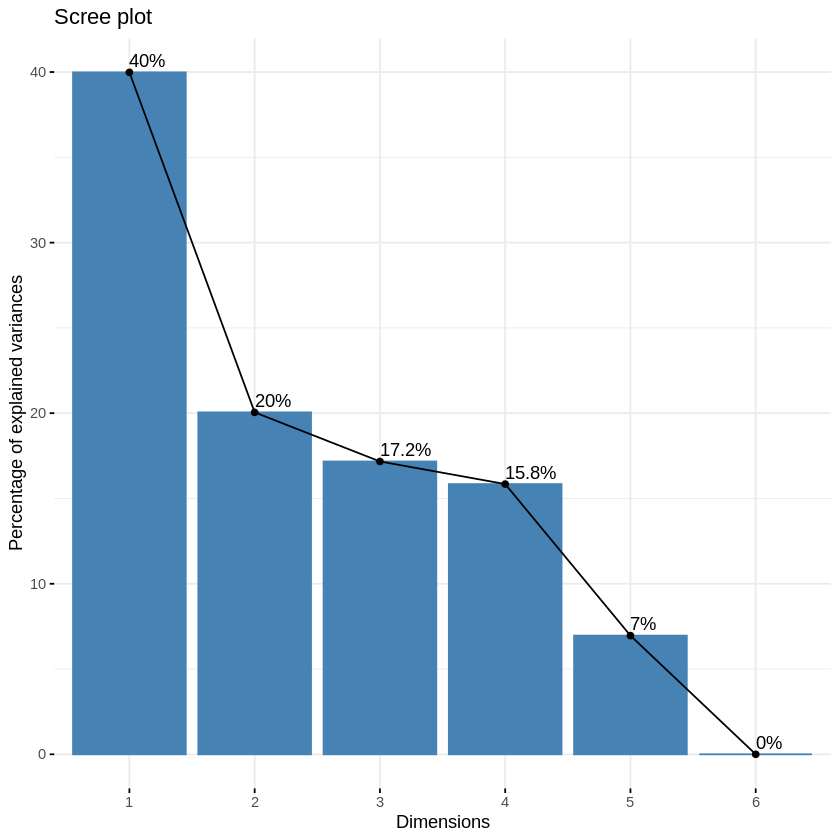

In [6]:
options(jupyter.plot_mimetypes = c("text/plain", "image/png" ))

fviz_eig(pca.vista_ctrl, addlabels = TRUE)

png 
  2

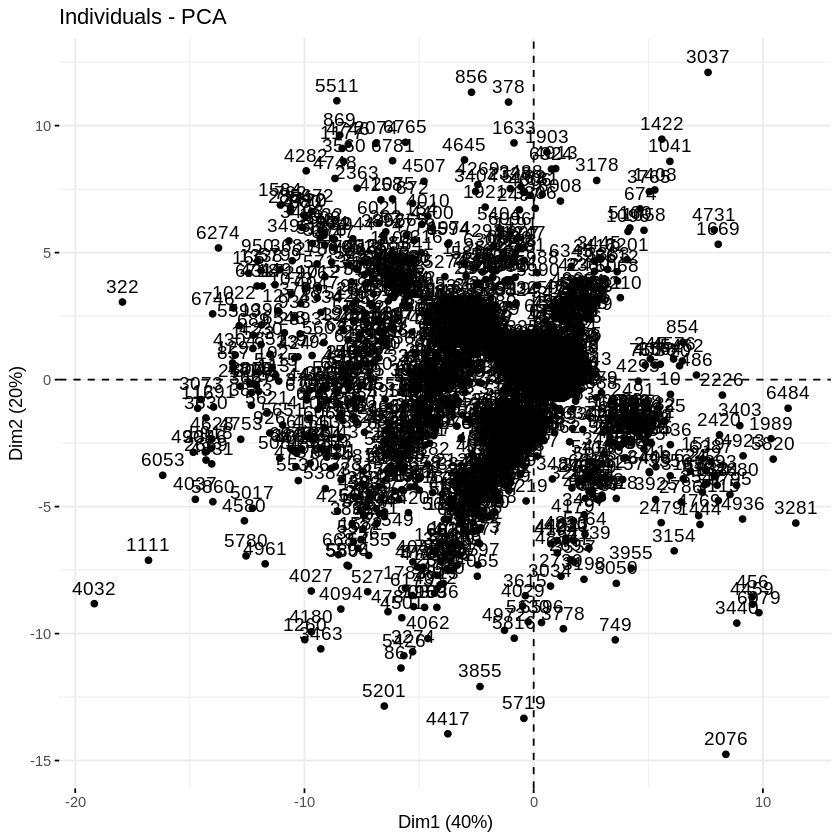

In [7]:
print(fviz_pca_ind(pca.vista_ctrl))

#save it 
pdf(file="PCA_geneInd_pattern_vista_vs_ctrl.pdf", width=7, height=7)
print(fviz_pca_ind(pca.vista_ctrl))
dev.off()

png 
  2

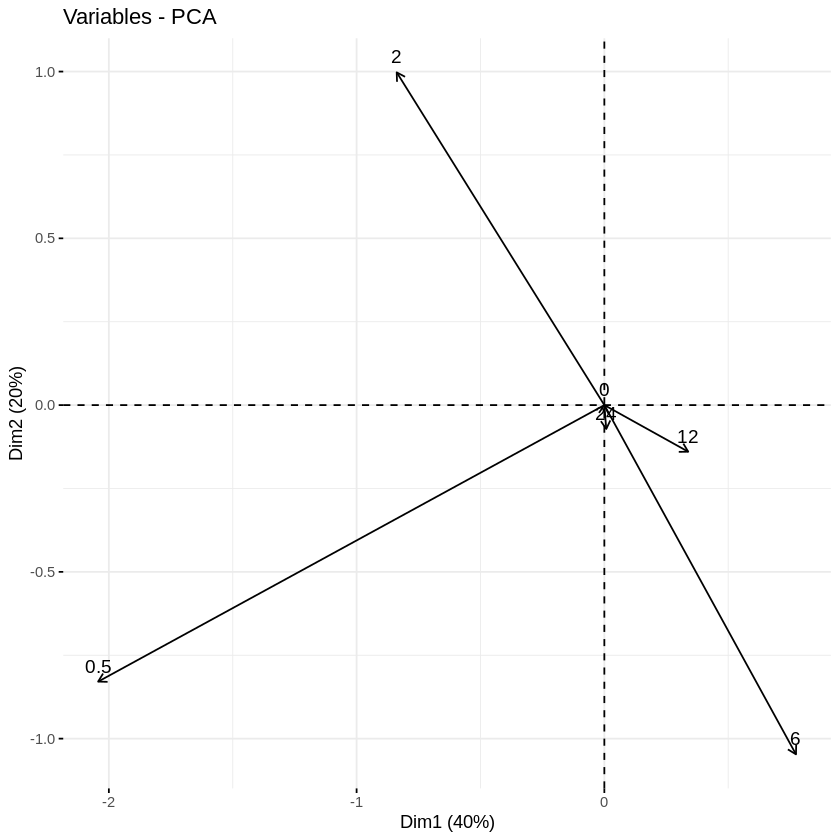

In [8]:
# do by time points
fviz_pca_var(pca.vista_ctrl)

pdf(file="PCA_varTimepoint_pattern_vista_vs_ctrl.pdf", width=7, height=7)
print(fviz_pca_var(pca.vista_ctrl))
dev.off()

A kinda weird pattern. don't know what it means!! Might need to look into it later.

## Second, we compare Vista SNS101 vs. control.

In [9]:
vistaSNS101_ctrl.matrix<-vistaSNS101_ctrl[,-c(1:2)]

pca.vistaSNS101_ctrl<-princomp(vistaSNS101_ctrl.matrix)

summary(pca.vistaSNS101_ctrl)

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4    Comp.5
Standard deviation     2.0829559 1.8354359 1.5402759 1.4225280 1.1713039
Proportion of Variance 0.3219694 0.2499959 0.1760563 0.1501676 0.1018108
Cumulative Proportion  0.3219694 0.5719654 0.7480217 0.8981892 1.0000000
                             Comp.6
Standard deviation     9.954546e-07
Proportion of Variance 7.353557e-14
Cumulative Proportion  1.000000e+00

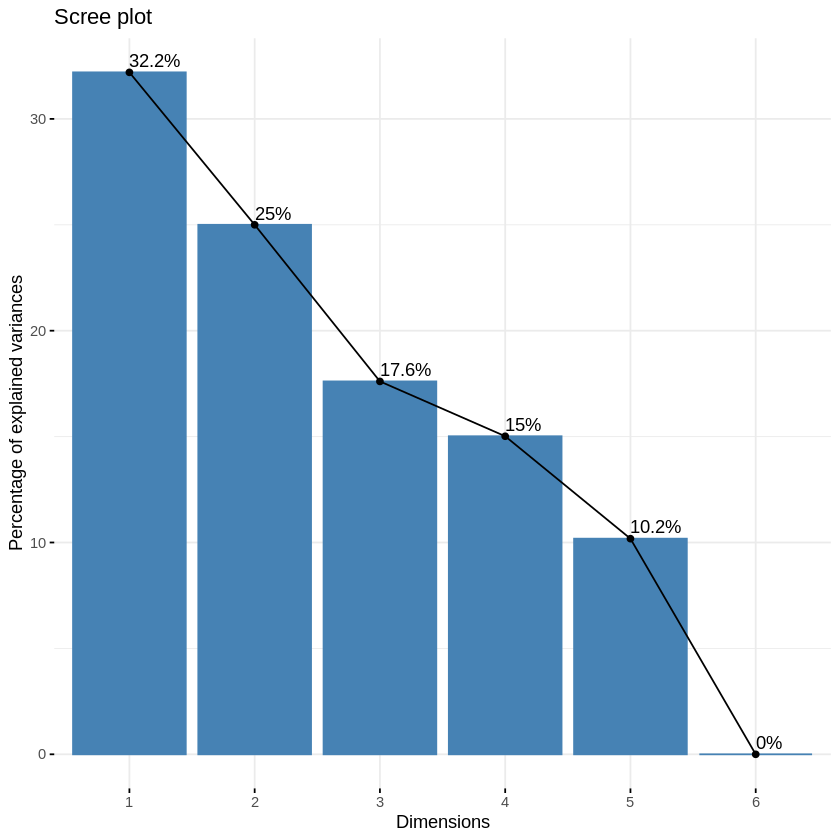

In [10]:
fviz_eig(pca.vistaSNS101_ctrl, addlabels = TRUE)

png 
  2

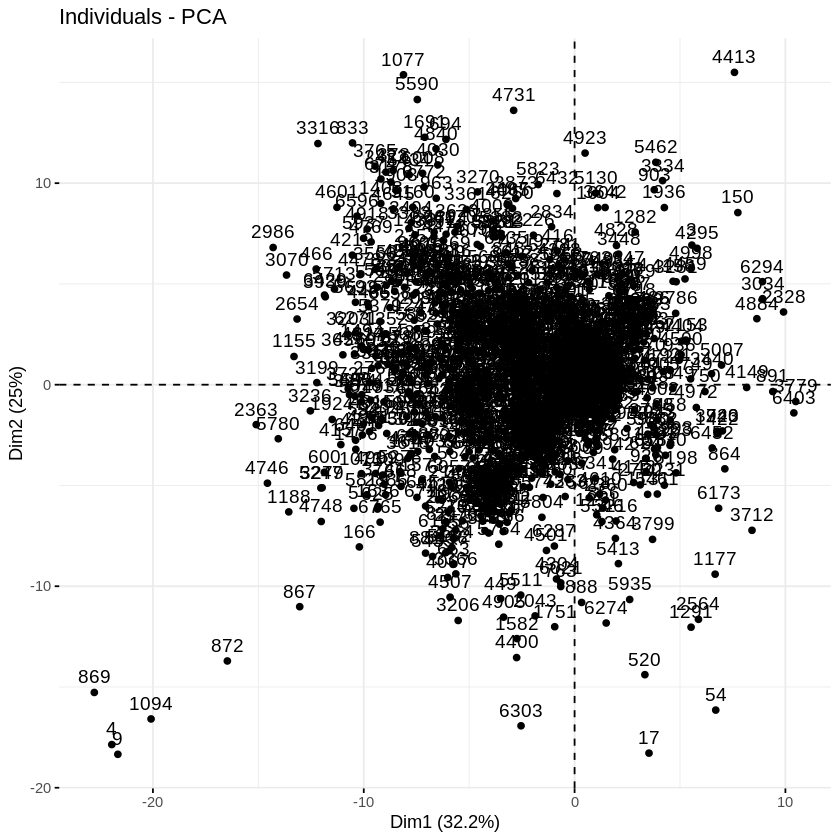

In [11]:
fviz_pca_ind(pca.vistaSNS101_ctrl)

pdf(file="PCA_geneInd_pattern_vistaSNS101_vs_ctrl.pdf", width=7, height=7)
print(fviz_pca_ind(pca.vistaSNS101_ctrl))
dev.off()

png 
  2

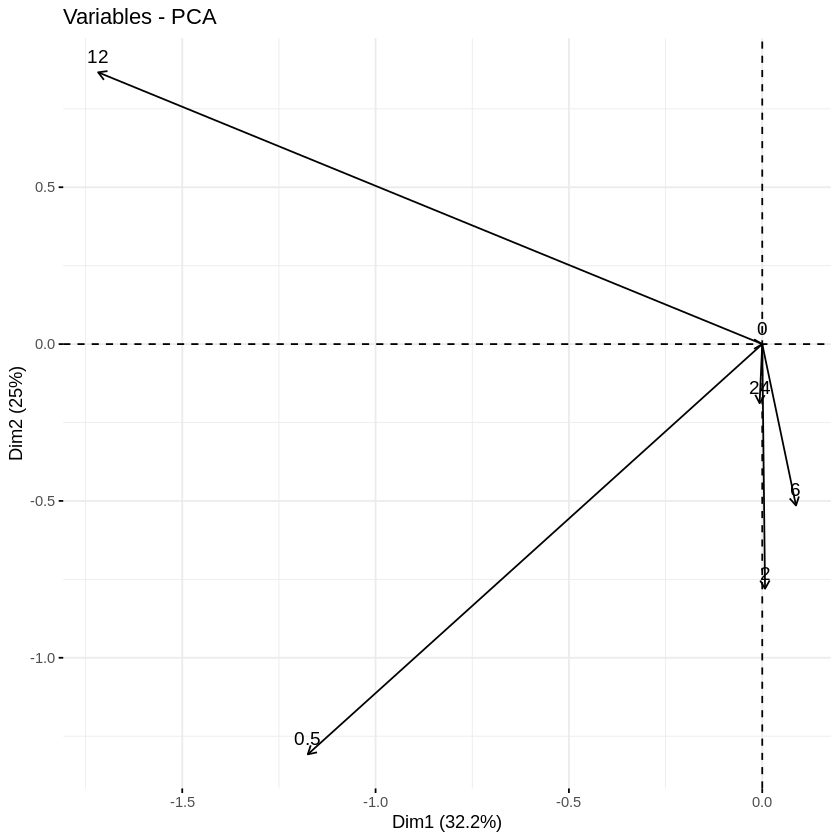

In [12]:
fviz_pca_var(pca.vistaSNS101_ctrl)

pdf(file="PCA_varTimepoint_pattern_vistaSNS101_vs_ctrl.pdf", width=7, height=7)
print(fviz_pca_var(pca.vistaSNS101_ctrl))
dev.off()

## Lastly, we do the difference between SNS101 vista vs Vista

In [13]:
vistaSNS101_vista.matrix<-vistaSNS101_vista[,-c(1:2)]

pca.vistaSNS101_vista<-princomp(vistaSNS101_vista.matrix)

summary(pca.vistaSNS101_vista)

Importance of components:
                          Comp.1    Comp.2   Comp.3    Comp.4    Comp.5
Standard deviation     2.4108200 2.0413592 1.544641 1.4577905 1.1650767
Proportion of Variance 0.3667449 0.2629501 0.150553 0.1340988 0.0856532
Cumulative Proportion  0.3667449 0.6296951 0.780248 0.9143468 1.0000000
                             Comp.6
Standard deviation     1.000267e-06
Proportion of Variance 6.313440e-14
Cumulative Proportion  1.000000e+00

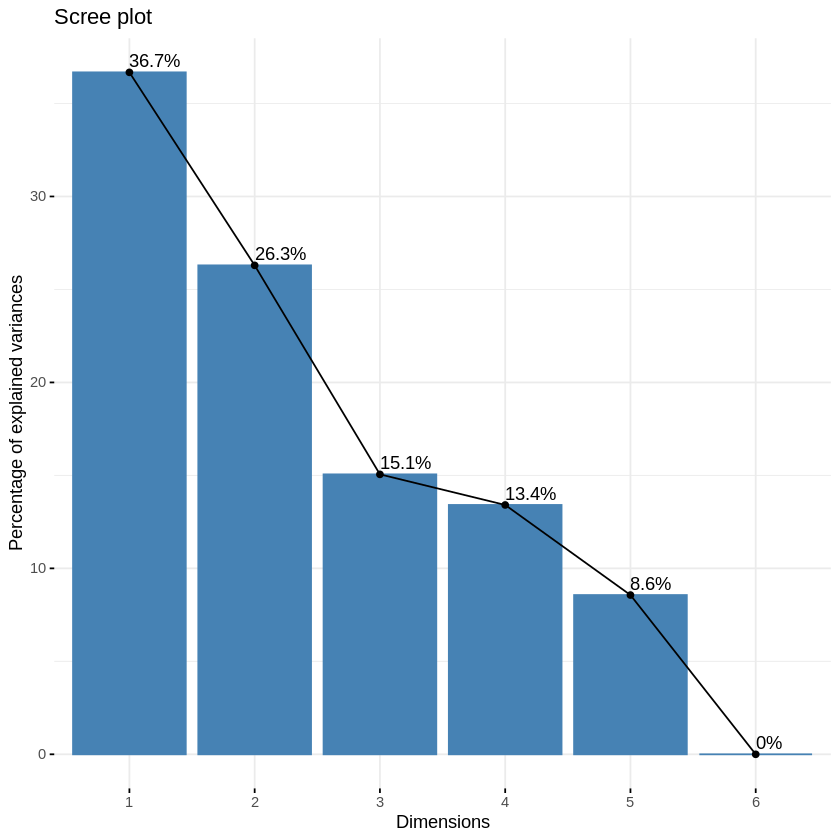

In [14]:
fviz_eig(pca.vistaSNS101_vista, addlabels = TRUE)

png 
  2

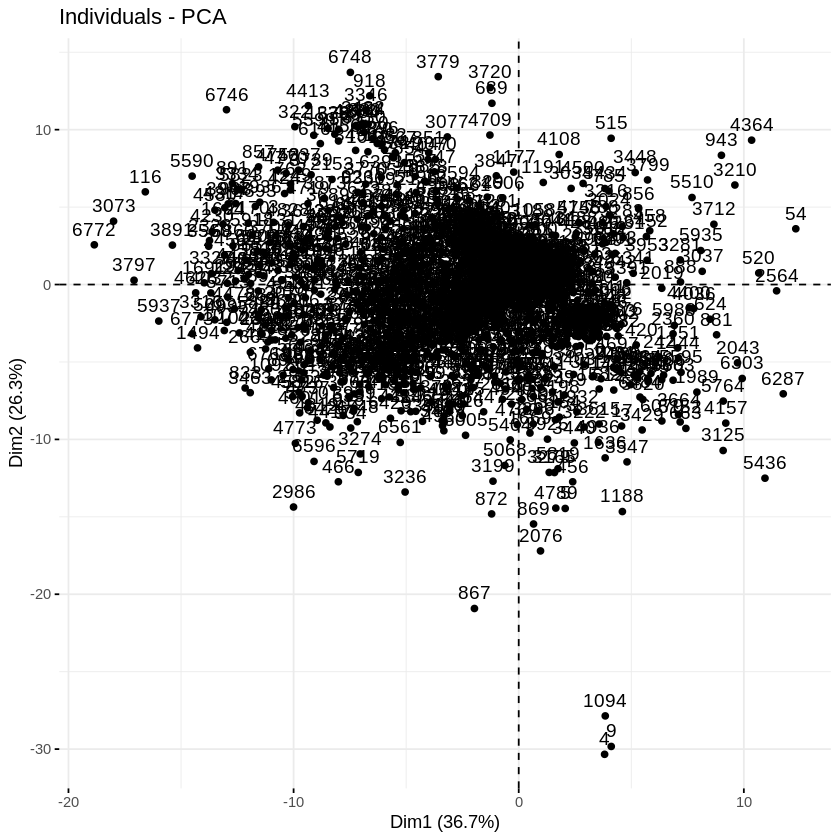

In [15]:
fviz_pca_ind(pca.vistaSNS101_vista)
pdf(file="PCA_geneInd_pattern_vista_vs_vistaSNS101.pdf", width=7, height=7)
print(fviz_pca_ind(pca.vistaSNS101_vista))
dev.off()

png 
  2

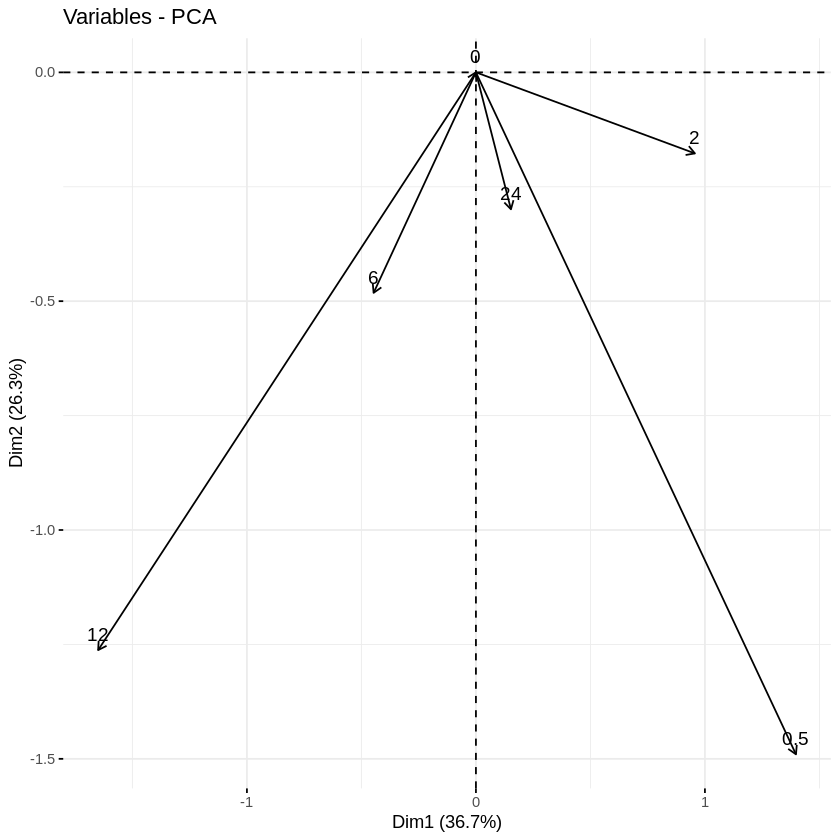

In [16]:
fviz_pca_var(pca.vistaSNS101_vista)

pdf(file="PCA_varTimepoint_pattern_vista_vs_vistaSNS101.pdf", width=7, height=7)
print(fviz_pca_var(pca.vistaSNS101_vista))
dev.off()

Done

In [17]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Ubuntu 22.04.2 LTS

Matrix products: default
BLAS/LAPACK: /opt/conda/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices datasets  utils     methods   base     

other attached packages:
 [1] forcats_0.5.2    stringr_1.5.0    purrr_1.0.1      tibble_3.1.8    
 [5] tidyverse_1.3.2  factoextra_1.0.7 ggplot2_3.4.0    FactoMineR_2.8  
 [9] rstatix_0.7.2    openxlsx_4.2.5.2 pheatmap_1.0.12  readr_2.1.3     
[13] diann_1.0.1      tidyr_1.3.0      dplyr_1.0.10     here_1.0.1      

loaded via a namespace (and not atta